### __Indice__
- [1.0 Importando librerias](#1.0-Importando-librerias) <font color=green>--> Ok</font>  
- [2.0 Carga del dataset](#2.0-Carga-del-dataset) <font color=green>--> Ok</font>  
- [3.0 Estudio de Modelos Pipeline y clases](#3.0-Estudio-de-Modelos-Pipeline-y-clases) <font color=green>--> Ok</font> 
    - [3.1 Ajustando el dataset](#3.1-Ajustando-el-dataset) <font color=green>--> Ok</font> 
    - [3.2 Modelo SVC](#3.2-Modelo-SVC) <font color=green>--> Ok</font> 
    - [3.3 Modelo LinearSVC](#3.2-Modelo-LinearSVC) <font color=green>--> Ok</font>   
    - [3.4 Modelo Random Forest](#3.4-Modelo-Random-Forest) <font color=green>--> Ok</font> 
    - [3.5 Modelo Logisitic Regression](#3.5-Modelo-Logisitic-Regression) <font color=green>--> Ok</font>
    - [3.6 Modelo KNeighbors](#3.6-Modelo-KNeighbors) <font color=green>--> Ok</font>
    - [3.7 Modelo GaussianNB](#3.7-Modelo-GaussianNB) <font color=green>--> Ok</font>
    - [3.8 Modelo DecisionTreeClassifier](#3.8-Modelo-DecisionTreeClassifier) <font color=green>--> Ok</font>
    - [3.9 Evaluando el rendimiento del Modelo](#3.9-Evaluando-el-rendimiento-del-Modelo) <font color=green>--> Ok</font>
    - [3.10 Estructurar el pipeline](#3.10-Estructurar-el-pipeline) <font color=green>--> Ok</font> 
    - [3.11 GridSearch CV](#3.11-GridSearch-CV) <font color=green>--> Ok</font> 
    - [3.12 Fit de los modelos](#3.12-Fit-de-los-modelos) <font color=green>--> Ok</font> 
    - [3.13 Mejor resultado](#3.13-Mejor-resultado) <font color=green>--> Ok</font> 
    - [3.14 Predicción del modelo final](#3.14-Predicción-del-modelo-final) <font color=green>--> Ok</font> 
- [4.0 Visualización de los resultados](#4.0-Visualización-de-los-resultados) <font color=green>--> Ok</font> 
    - [4.1 Visualizando reducciones de dimensionalidad](#4.1-Visualizando-reducciones-de-dimensionalidad) <font color=green>--> Ok</font>  
- [5.0 Grafico de Tiros](#5.0-Grafico-de-Tiros) <font color=green>--> Ok</font> 
    - [5.1 Grafico de todos los tiros](#5.1-Grafico-de-todos-los-tiros) <font color=green>--> Ok</font>
    - [5.2 Grafico de tiros individuales de la matrix de confusión](#5.2-Grafico-de-tiros-individuales-de-la-matrix-de-confusión) <font color=green>--> Ok</font>
    - [5.3 Matrix de confusión adaptada](#5.3-Matrix-de-confusión-adaptada) <font color=green>--> Ok</font>

    
   

# Desafío 3 - NBA (Parte 2: Predicción)
Predecir si un es un "shot made" (45%) o "shot missed" (55%) en la temporada 2104-15, considerando 30 equipos, ~500 jugadores, ~1.200 partidos y ~220.000 tiros

## 1.0 Importando librerias

In [1]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [2]:
#Instalando librerías adicionales
#!pip install pandas-profiling
#!pip install xgboost
#!pip install yellowbrick

In [1]:
#Importar librerías

## Básicas
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
%matplotlib inline

## Modelos
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import svm, linear_model
from sklearn.manifold import TSNE
from sklearn.manifold import MDS
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC,LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn import datasets


## Pipeline
from sklearn.pipeline import Pipeline, make_pipeline, make_union
from sklearn.preprocessing import normalize, Imputer, StandardScaler, LabelEncoder
from sklearn.base import BaseEstimator, TransformerMixin

## Yellowbrick

## Otros
#import pickle
#from clases.random_classes import GetDummiesTransformer

## 2.0 Carga del dataset

In [2]:
df = pd.read_csv("nba_final.csv")

In [3]:
df.head()

,period,shot_made_flag,shot_distance,x,y,dribbles,defender_distance,shot_clock,time_remaining,HEIGHT_PLAYER,...,shot_type_alley,shot_type_bank,shot_type_dunk,shot_type_fadeaway,shot_type_finger,shot_type_hook,shot_type_jump,shot_type_layup,shot_type_tip,shot_3pts
0,2,1,0,0,1,0,3.7,20.0,31,82.0,...,1,0,1,0,0,0,0,0,0,0.0
1,2,1,0,2,7,0,3.8,7.8,514,80.0,...,0,0,0,0,1,0,0,1,0,0.0
2,1,0,6,-5,69,2,3.0,13.4,120,80.0,...,0,0,0,0,0,1,0,0,0,0.0
3,1,0,3,-11,33,2,1.5,14.6,473,80.0,...,0,0,0,0,0,0,1,0,0,0.0
4,2,0,3,34,14,1,1.0,5.6,73,73.0,...,0,0,0,0,0,0,1,0,0,0.0


In [4]:
df.shape

(160664, 32)

In [5]:
df = pd.get_dummies(df, prefix=['POSITION_PLAYER','POSITION_DEFENDER'])

In [6]:
X=df

## 3.0 Estudio de Modelos Pipeline y clases

### 3.1 Ajustando el dataset

In [7]:
df = df.sample(n=500, random_state=42)

In [8]:
# Top20 features
X = df[[ u'shot_distance', u'x', u'y', u'dribbles', u'defender_distance', u'shot_clock',
        u'time_remaining', u'shot_type_bank', u'shot_type_fadeaway', u'shot_type_finger', u'shot_type_hook', u'shot_type_jump',
        u'shot_type_layup', u'shot_type_tip',u'shot_type_dunk',u'SEASON_EXP_PLAYER', u'HEIGHT_DEFENDER', u'SEASON_EXP_PLAYER', u'WEIGHT_DEFENDER', u'AGE_PLAYER']]

y = df[u'shot_made_flag']

In [9]:
X.shape

(500, 20)

In [10]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 3.2 Modelo SVC

In [13]:
svc_clf = SVC() 
svc_clf.fit(X_train, y_train)
pred_svc = svc_clf.predict(X_test)
acc_svc = accuracy_score(y_test, pred_svc)

print(acc_svc)

0.52


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


### 3.3 Modelo LinearSVC

In [14]:
linsvc_clf = LinearSVC()
linsvc_clf.fit(X_train, y_train)
pred_linsvc = linsvc_clf.predict(X_test)
acc_linsvc = accuracy_score(y_test, pred_linsvc)

print(acc_linsvc)

0.5


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


### 3.4 Modelo Random Forest

In [15]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
pred_rf = rf_clf.predict(X_test)
acc_rf = accuracy_score(y_test, pred_rf)

print(acc_rf)

0.6


/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


### 3.5 Modelo Logisitic Regression

In [16]:
logreg_clf = LogisticRegression()
logreg_clf.fit(X_train, y_train)
pred_logreg = logreg_clf.predict(X_test)
acc_logreg = accuracy_score(y_test, pred_rf)

print(acc_logreg)

0.6


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### 3.6 Modelo KNeighbors

In [17]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)
pred_knn = knn_clf.predict(X_test)
acc_knn = accuracy_score(y_test, pred_knn)

print(acc_knn)

0.48


### 3.7 Modelo GaussianNB

In [18]:
gnb_clf = GaussianNB()
gnb_clf.fit(X_train, y_train)
pred_gnb = gnb_clf.predict(X_test)
acc_gnb = accuracy_score(y_test, pred_gnb)

print(acc_gnb)

0.63


### 3.8 Modelo DecisionTreeClassifier

In [19]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)
pred_dt = dt_clf.predict(X_test)
acc_dt = accuracy_score(y_test, pred_dt)

print(acc_dt)

0.55


### 3.9 Evaluando el rendimiento del Modelo

Después de realizar tantos modelos y predicciones, deberíamos evaluar y ver qué modelo funcionó mejor y qué modelo utilizar en nuestro set de test.

In [20]:
model_performance = pd.DataFrame({
    "Model": ["SVC", "Linear SVC", "Random Forest", 
              "Logistic Regression", "K Nearest Neighbors", "Gaussian Naive Bayes",  
              "Decision Tree"],
    "Accuracy": [acc_svc, acc_linsvc, acc_rf, 
              acc_logreg, acc_knn, acc_gnb, acc_dt]
})

model_performance.sort_values(by="Accuracy", ascending=False)

,Model,Accuracy
5,Gaussian Naive Bayes,0.63
2,Random Forest,0.60
3,Logistic Regression,0.60
6,Decision Tree,0.55
0,SVC,0.52
1,Linear SVC,0.50
4,K Nearest Neighbors,0.48


Parece que el modelo de Gaussian Naive Bayes funciona mejor con nuestros datos, por lo que lo usaremos en el set de Test.

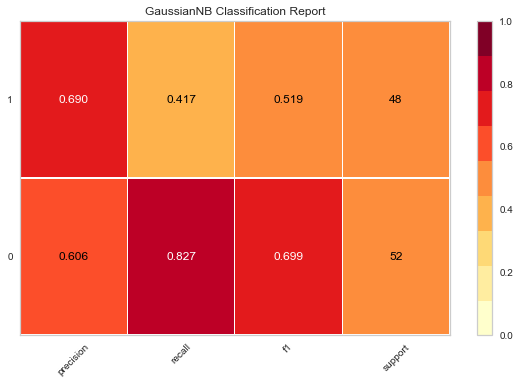

In [21]:
classes = ['0', '1']

from sklearn.naive_bayes import GaussianNB
from yellowbrick.classifier import ClassificationReport

# Instantiate the classification model and visualizer
bayes = GaussianNB()
visualizer = ClassificationReport(bayes, classes=classes, support=True)

visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()             # Draw/show/poof the data'''

### 3.10 Estructurar el pipeline

In [22]:
pipeline = Pipeline([
   ('scaler', StandardScaler()),  
   ('clf', MultinomialNB()),
])

In [23]:
parameters = [
    {'clf': [GaussianNB()]},
     {'clf': [LogisticRegression()],
    'clf__C': np.linspace(1, 1e10,500)},
    {'clf': [SVC()],
    'clf__C': [1e-2,1,1.1,1.2,1.3,1.4]}
]

In [24]:
parameters = [
    {'clf': [SVC()],
    'clf__C': [1e-2,1,1.1,1.2,1.3,1.4],
    'clf__gamma': ['auto',1e-4,1,1.1,1.2]},
    {'clf': [LogisticRegression()],
    'clf__C': np.linspace(1, 1e10,500)},
    {'clf': [GaussianNB()]}
    
]

### 3.11 GridSearch CV

In [25]:
grid_search = GridSearchCV(pipeline, parameters, scoring='accuracy', cv=8, n_jobs = -1 )

### 3.12 Fit de los modelos

In [26]:
grid_search.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=8, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('clf',
                                        MultinomialNB(alpha=1.0,
                                                      class_prior=None,
                                                      fit_prior=True))],
                                verbose=False),
             iid='warn', n_jobs=-1,
             param_grid=[{'clf': [SVC(C=1, cache_size=200, class_weight=None,
                                      coef0=0.0, decision_function_shape...
       9.69939880e+09, 9.71943888e+09, 9.73947896e+09, 9.75951904e+09,
       9.77955912e+09, 9.79959920e+09, 9.81963928e+09, 9.83967936e+09,
       

### 3.13 Mejor resultado

In [27]:
print("Mejor Resultado: %0.3f" % grid_search . best_score_)  

Mejor Resultado: 0.680


### 3.14 Predicción del modelo final

In [28]:
y_pred = grid_search.best_estimator_.predict(X_test)

In [29]:
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.63      0.81      0.71        52
           1       0.70      0.48      0.57        48

    accuracy                           0.65       100
   macro avg       0.66      0.64      0.64       100
weighted avg       0.66      0.65      0.64       100

0.65


## 4.0 Visualización de los resultados

### 4.1 Visualizando reducciones de dimensionalidad

#### 4.1.1 T-SNE

In [30]:
#t-SNE
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)

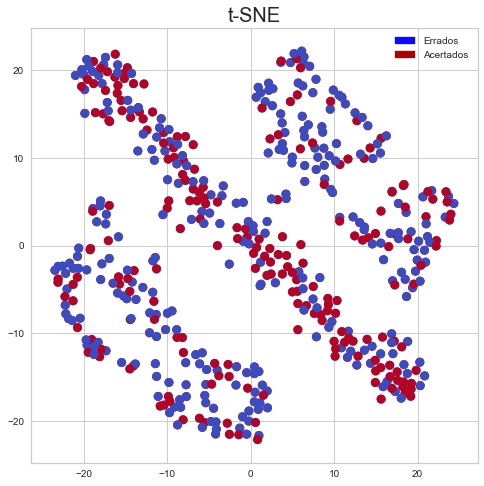

In [31]:
f, ax = plt.subplots(figsize=(8,8))

blue_patch = mpatches.Patch(color='#0A0AFF', label='Errados')
red_patch = mpatches.Patch(color='#AF0000', label='Acertados')

ax.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='Errados', linewidths=2)
ax.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Acertados', linewidths=2)
ax.set_title('t-SNE', fontsize=20)

ax.grid(True)

ax.legend(handles=[blue_patch, red_patch])

#### 4.1.2 MDS

In [32]:
#mds
X_reduced_mds = MDS(n_components=2, random_state=42).fit_transform(X.values)

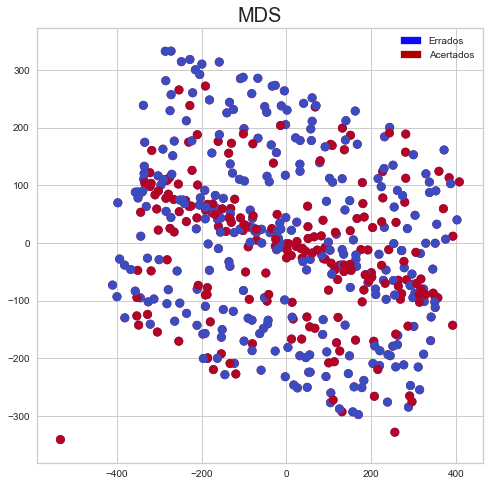

In [33]:
f, ax = plt.subplots(figsize=(8,8))

blue_patch = mpatches.Patch(color='#0A0AFF', label='Errados')
red_patch = mpatches.Patch(color='#AF0000', label='Acertados')

ax.scatter(X_reduced_mds[:,0], X_reduced_mds[:,1], c=(y == 0), cmap='coolwarm', label='Errados', linewidths=2)
ax.scatter(X_reduced_mds[:,0], X_reduced_mds[:,1], c=(y == 1), cmap='coolwarm', label='Acertados', linewidths=2)
ax.set_title('MDS', fontsize=20)

ax.grid(True)

ax.legend(handles=[blue_patch, red_patch])

### 5.0 Grafico de Tiros

In [34]:
# Función para diseñar la cancha
from matplotlib.patches import Circle, Rectangle, Arc

def draw_court(ax=None, color='black', lw=2, outer_lines=True):
    # If an axes object isn't provided to plot onto, just get current one
    if ax is None:
        ax = plt.gca()

    # Create the various parts of an NBA basketball court

    # Create the basketball hoop
    # Diameter of a hoop is 18" so it has a radius of 9", which is a value
    # 7.5 in our coordinate system
    hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)

    # Create backboard
    backboard = Rectangle((-30, -7.5), 60, -1, linewidth=lw, color=color)

    # The paint
    # Create the outer box 0f the paint, width=16ft, height=19ft
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color,
                          fill=False)
    # Create the inner box of the paint, widt=12ft, height=19ft
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color,
                          fill=False)

    # Create free throw top arc
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180,
                         linewidth=lw, color=color, fill=False)
    # Create free throw bottom arc
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0,
                            linewidth=lw, color=color, linestyle='dashed')
    # Restricted Zone, it is an arc with 4ft radius from center of the hoop
    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw,
                     color=color)

    # Three point line
    # Create the side 3pt lines, they are 14ft long before they begin to arc
    corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=lw,
                               color=color)
    corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)
    # 3pt arc - center of arc will be the hoop, arc is 23'9" away from hoop
    # I just played around with the theta values until they lined up with the 
    # threes
    three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw,
                    color=color)

    # Center Court
    center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0,
                           linewidth=lw, color=color)
    center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0,
                           linewidth=lw, color=color)

    # List of the court elements to be plotted onto the axes
    court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
                      bottom_free_throw, restricted, corner_three_a,
                      corner_three_b, three_arc, center_outer_arc,
                      center_inner_arc]

    if outer_lines:
        # Draw the half court line, baseline and side out bound lines
        outer_lines = Rectangle((-250, -47.5), 500, 470, linewidth=lw,
                                color=color, fill=False)
        court_elements.append(outer_lines)

    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)

    return ax

#### 5.1 Grafico de todos los tiros

In [35]:
df.shot_made_flag.value_counts()

0    290
1    210
Name: shot_made_flag, dtype: int64

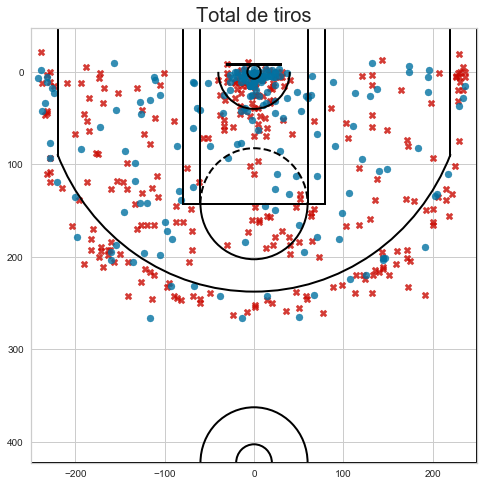

In [36]:
plt.figure(figsize=(8,8))

i = df['shot_made_flag']==0

#shots missed
plt.scatter(df.x[i], df.y[i], alpha=0.8, c='r', marker='X')

#shots made
plt.scatter(df.x[~i], df.y[~i], alpha=0.8, c='b', marker='o')

draw_court()
# Adjust plot limits to just fit in half court
plt.xlim(-250,250)
plt.ylim(422.5, -47.5)
plt.title('Total de tiros', size=20)
plt.show()

#### 5.2 Grafico de tiros individuales de la matrix de confusión

In [37]:
y_pred_series = (pd.Series(y_pred, index=X_test.index, name='pred'))

In [38]:
matrix = pd.concat([y_pred_series, y_test], axis = 1)

In [42]:
matrix

,pred,shot_made_flag
50671,0,0
54776,0,0
134550,0,1
107242,0,1
29848,0,0
32500,1,1
158513,1,1
103745,0,1
15766,1,1
86383,0,0


In [41]:
matrix.size

200

In [43]:
TP = matrix[(matrix['pred'] == 1) & (matrix['shot_made_flag'] == 1)]
TN = matrix[(matrix['pred'] == 0) & (matrix['shot_made_flag'] == 0)]
FP = matrix[(matrix['pred'] == 0) & (matrix['shot_made_flag'] == 1)]
FN = matrix[(matrix['pred'] == 1) & (matrix['shot_made_flag'] == 0)]

In [52]:
TP

,pred,shot_made_flag
32500,1,1
158513,1,1
15766,1,1
93221,1,1
154982,1,1
40741,1,1
127360,1,1
7327,1,1
109527,1,1
87134,1,1


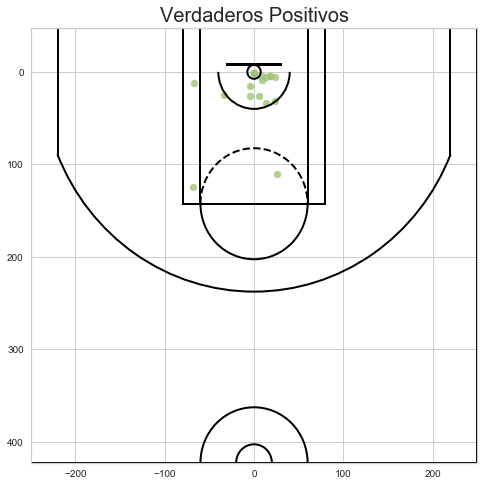

In [45]:
#Verdaderos Positivos
plt.figure(figsize=(8,8))
plt.scatter(df.x[TP.index], df.y[TP.index], alpha=0.8, c='g', marker='o')
draw_court()
plt.xlim(-250,250)
plt.ylim(422.5, -47.5)
plt.title('Verdaderos Positivos', size=20)

plt.show()

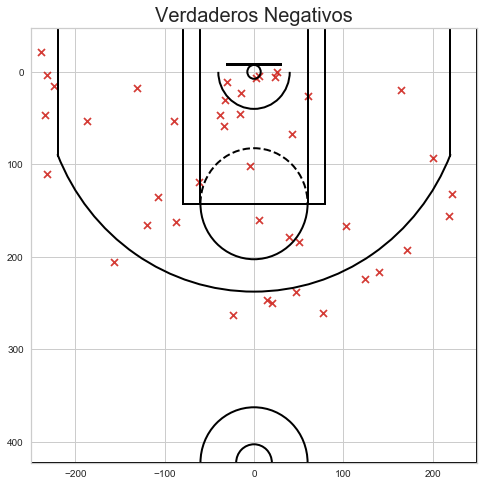

In [42]:
#Verdaderos Negativos
plt.figure(figsize=(8,8))
plt.scatter(df.x[TN.index], df.y[TN.index], alpha=0.8, c='r', marker='x')
draw_court()
plt.xlim(-250,250)
plt.ylim(422.5, -47.5)
plt.title('Verdaderos Negativos', size=20)
plt.show()

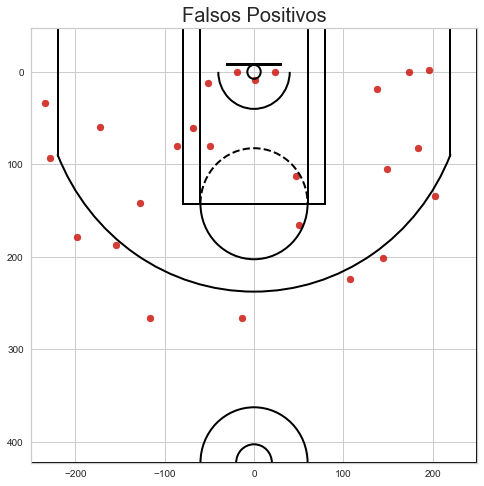

In [44]:
#Falsos Positivos
plt.figure(figsize=(8,8))
plt.scatter(df.x[FP.index], df.y[FP.index], alpha=0.8, c='r', marker='o')
draw_court()
plt.xlim(-250,250)
plt.ylim(422.5, -47.5)
plt.title('Falsos Positivos', size=20)
plt.show()

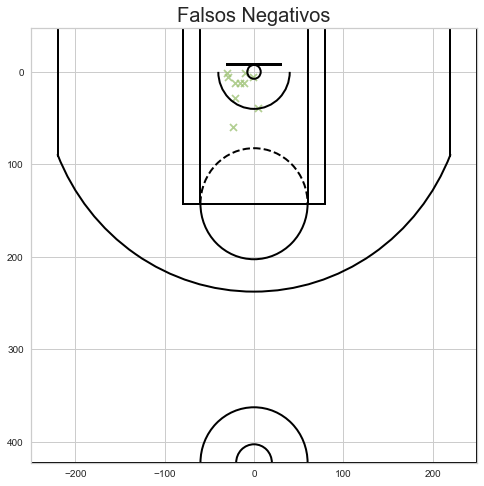

In [45]:
#Falsos Negativos
plt.figure(figsize=(8,8))
plt.scatter(df.x[FN.index], df.y[FN.index], alpha=0.8, c='g', marker='x')
draw_court()
plt.xlim(-250,250)
plt.ylim(422.5, -47.5)
plt.title('Falsos Negativos', size=20)
plt.show()

#### 5.3 Matrix de confusión adaptada

In [46]:
TN_n = 'Verdaderos Negativos, n = ' + str(TN.size)
FP_n = 'Falsos Positivos, n = ' + str(FP.size)
FN_n = 'Falsos Negativos, n = ' + str(FN.size)
TP_n = 'Verdaderos Positivos, n = ' + str(TP.size)
Acc  = str('{:.2f}'.format(accuracy_score(y_test, y_pred)))
Title = 'Matriz de confusión, n = ' + str(matrix.size) + ', acc = ' + Acc

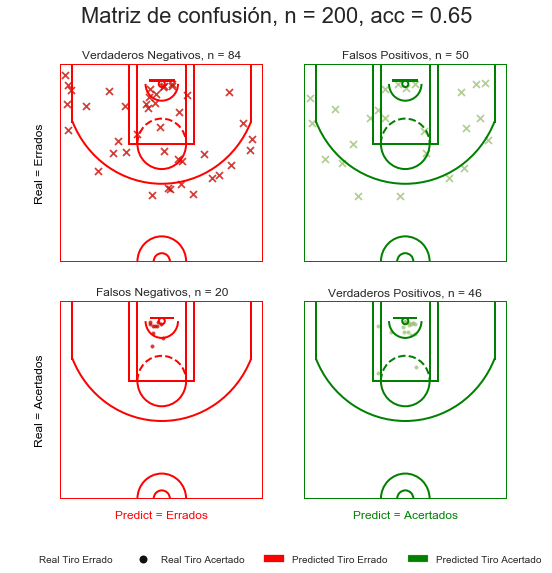

In [47]:
# Armando el subplot
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(8,8))
fig.suptitle(Title, size=22)

# Plotando los gráficos
axes[0][0].scatter(df.x[TN.index], df.y[TN.index], alpha=0.8, c='r', marker='x')
axes[0][1].scatter(df.x[FP.index], df.y[FP.index], alpha=0.8, c='g', marker='x')
axes[1][0].scatter(df.x[FN.index], df.y[FN.index], alpha=0.8, c='r', marker='.')
axes[1][1].scatter(df.x[TP.index], df.y[TP.index], alpha=0.8, c='g', marker='.')

# Plotando el title de cada subplot
axes[0][0].title.set_text(TN_n)
axes[0][1].title.set_text(FP_n)
axes[1][0].title.set_text(FN_n)
axes[1][1].title.set_text(TP_n)

# Ajustando y sacando los ejes + plotando la cancha
axes[0][0].set_xlim([-250,250])
axes[0][0].set_ylim([422.5, -47.5])
axes[0][0].axis('off')
axes[0][1].axis('off')
axes[1][0].axis('off')
axes[1][1].axis('off')
draw_court(ax=axes[0][0], color = 'red', outer_lines=True)
draw_court(ax=axes[0][1], color = 'green', outer_lines=True)
draw_court(ax=axes[1][0], color = 'red', outer_lines=True)
draw_court(ax=axes[1][1], color = 'green', outer_lines=True)

# Plotando los labels 
axes[0][0].text(-0.1, 0.5,  "Real = Errados", size=12, ha="center", va='center', transform=axes[0][0].transAxes, color='black', rotation = 'vertical')
axes[1][0].text(-0.1, 0.5, "Real = Acertados", size=12, ha="center",va='center', transform=axes[1][0].transAxes, color='black', rotation = 'vertical')
axes[1][0].text(0.5,-0.1, "Predict = Errados", size=12, ha="center", transform=axes[1][0].transAxes, color='red')
axes[1][1].text(0.5,-0.1, "Predict = Acertados", size=12, ha="center", transform=axes[1][1].transAxes, color='green')

# Armando y plotando la legenda
legend_elements = [Line2D([0], [0], marker='x', color='k', label='Real Tiro Errado', markersize=8, linewidth=0),
                   Line2D([0], [0], marker='o', color='k', label='Real Tiro Acertado', markersize=8, linewidth=0),
                   Patch(facecolor='red', edgecolor='r', label='Predicted Tiro Errado'),
                   Patch(facecolor='green', edgecolor='g', label='Predicted Tiro Acertado')]
fig.legend(handles=legend_elements, loc=8, ncol=4, frameon=False)

# Mostrando el gráfico completo
plt.show()

# Conclusión para mejorar la predicción

    Para tener una mejor prediccion, le agregaria algunos datos como:
    Porcentaje de efectividasd del jugador 
    Porcentaje total de tiros acertado y errados.
    Porcentaje de tiros libres
    Porcentaje de tiros de 2, 
    Porcentaje de Tiros 3, 
    Porcentaje de tapas,
    Porcentaje de de defensa.
    Porcentaje de efectividad por cuarto.

# FIN.